In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid")

In [2]:
data=pd.read_csv('C:/Users/ASUS/OneDrive/Documents/TECHNOCOLABS/Analysing-Credit-Risk-on-European-Peer-to-Peer-lending-Firm-Bandora/Bandora_cleaned.csv',low_memory=False)

In [3]:
data.head()

Unnamed: 0  BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0           0                     0        0   -0.320452                  0   
1           1                     0        0   -0.320453                  1   
2           2                     0        0   -0.652831                  1   
3           3                     0        0   -0.738056                  1   
4           4                     0        0   -0.490903                  1   

   VerificationType LanguageCode  Age  Gender  Country  ...  \
0                 2            1   20     0.0        0  ...   
1                 2            1   49     1.0        0  ...   
2                 2            1   19     0.0        0  ...   
3                 2            1   18     0.0        0  ...   
4                 2            1   41     0.0        0  ...   

   CreditScoreEsMicroL  CreditScoreEeMini  PrincipalPaymentsMade  \
0                    0           0.326344              -0.547432   
1                    0           0.326344              -0.553912   
2                    0           0.326344              -0.522948   
3                    0           0.326344              -0.552114   
4                    0           0.326344              -0.483360   

   InterestAndPenaltyPaymentsMade  PrincipalBalance InterestAndPenaltyBalance  \
0                       -0.593062         -0.734372                  0.346301   
1                       -0.593062         -0.729980                  0.342270   
2                       -0.593062         -0.873437                 -0.167280   
3                       -0.593062         -0.885067                 -0.268672   
4                       -0.593062         -0.840602                  0.391126   

   NoOfPreviousLoansBeforeLoan AmountOfPreviousLoansBeforeLoan  \
0                            4                       -0.366252   
1                            0                       -0.642243   
2                            0                       -0.642243   
3                            1                       -0.616897   
4                            1                       -0.571847   

   PreviousEarlyRepaymentsCountBeforeLoan    county  
0                                       0 -0.721207  
1                                       0 -0.662752  
2                                       0 -0.414320  
3                                       0 -0.414320  
4                                       0 -0.768701  

[5 rows x 45 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131836 entries, 0 to 131835
Data columns (total 45 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Unnamed: 0                              131836 non-null  int64  
 1   BidsPortfolioManager                    131836 non-null  int64  
 2   BidsApi                                 131836 non-null  int64  
 3   BidsManual                              131836 non-null  float64
 4   NewCreditCustomer                       131836 non-null  int64  
 5   VerificationType                        131836 non-null  int64  
 6   LanguageCode                            131836 non-null  object 
 7   Age                                     131836 non-null  int64  
 8   Gender                                  131836 non-null  float64
 9   Country                                 131836 non-null  int64  
 10  AppliedAmount                           1318

In [5]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.drop(['county'],axis=1,inplace=True)

In [6]:
np.round(data.describe(),1)

BidsPortfolioManager   BidsApi  BidsManual  NewCreditCustomer  \
count              131836.0  131836.0    131836.0           131836.0   
mean                  984.0      29.7         0.0                0.6   
std                  1362.4     151.6         1.0                0.5   
min                     0.0       0.0        -0.7                0.0   
25%                   167.0       0.0        -0.6                0.0   
50%                   479.0       0.0        -0.3                1.0   
75%                  1243.0       5.0         0.2                1.0   
max                 10625.0    7570.0        13.4                1.0   

       VerificationType       Age    Gender   Country  AppliedAmount  \
count          131836.0  131836.0  131836.0  131836.0       131836.0   
mean                2.8      41.0       0.4       0.7            0.0   
std                 1.4      12.3       0.6       0.9            1.0   
min                 0.0       0.0       0.0       0.0           -1.1   
25%                 1.0      31.0       0.0       0.0           -0.8   
50%                 4.0      40.0       0.0       0.0           -0.3   
75%                 4.0      50.0       1.0       1.0            0.6   
max                 4.0      75.0       2.0       3.0            3.3   

         Amount  ...    Rating  CreditScoreEsMicroL  CreditScoreEeMini  \
count  131836.0  ...  131836.0             131836.0           131836.0   
mean        0.0  ...       4.2                  0.3               -0.0   
std         1.0  ...       1.9                  1.2                1.0   
min        -1.2  ...       0.0                  0.0              -12.3   
25%        -0.8  ...       3.0                  0.0                0.3   
50%        -0.2  ...       4.0                  0.0                0.3   
75%         0.5  ...       6.0                  0.0                0.3   
max         3.7  ...       8.0                 10.0                0.3   

       PrincipalPaymentsMade  InterestAndPenaltyPaymentsMade  \
count               131836.0                        131836.0   
mean                     0.0                            -0.0   
std                      1.0                             1.0   
min                     -0.6                            -0.6   
25%                     -0.5                            -0.5   
50%                     -0.4                            -0.4   
75%                      0.0                             0.1   
max                      7.2                            19.7   

       PrincipalBalance  InterestAndPenaltyBalance  \
count          131836.0                   131836.0   
mean               -0.0                        0.0   
std                 1.0                        1.0   
min                -0.9                       -0.3   
25%                -0.7                       -0.3   
50%                -0.3                       -0.3   
75%                 0.4                       -0.2   
max                 4.3                       25.1   

       NoOfPreviousLoansBeforeLoan  AmountOfPreviousLoansBeforeLoan  \
count                     131836.0                         131836.0   
mean                           1.5                              0.0   
std                            2.4                              1.0   
min                            0.0                             -0.6   
25%                            0.0                             -0.6   
50%                            1.0                             -0.5   
75%                            2.0                              0.3   
max                           25.0                             11.2   

       PreviousEarlyRepaymentsCountBeforeLoan  
count                                131836.0  
mean                                      0.1  
std                                       0.4  
min                                       0.0  
25%                                       0.0  
50%                                       0.0  
75

In [7]:
data['EmploymentStatus'] = pd.Categorical(data.EmploymentStatus)
data['RecoveryStage'] = pd.Categorical(data.RecoveryStage)
data['LanguageCode'] = pd.Categorical(data.LanguageCode)
data['Gender'] = pd.Categorical(data.Gender)
data['UseOfLoan'] = pd.Categorical(data.UseOfLoan)
data['Education'] = pd.Categorical(data.Education )
data['MaritalStatus'] = pd.Categorical(data.MaritalStatus)
data['VerificationType'] = pd.Categorical(data.VerificationType)
data['OccupationArea'] = pd.Categorical(data.OccupationArea)
data['HomeOwnershipType'] = pd.Categorical(data.HomeOwnershipType)
data['Restructured'] = pd.Categorical(data.Restructured)
data['Country'] = pd.Categorical(data.Country) 
data['County'] = pd.Categorical(data.County) 
data['City'] = pd.Categorical(data.City) 
data['Rating'] = pd.Categorical(data.Rating) 
data['NewCreditCustomer'] = pd.Categorical(data.NewCreditCustomer)

In [8]:
cat_cols=data.select_dtypes(exclude=['int','float']).columns
cat_cols

Index(['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Gender',
       'Country', 'County', 'City', 'UseOfLoan', 'Education', 'MaritalStatus',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer',
       'OccupationArea', 'HomeOwnershipType', 'RecoveryStage', 'Rating',
       'Status', 'Restructured'],
      dtype='object')

In [9]:
num_cols=data.select_dtypes(include=['int','float']).columns
num_cols


Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Age', 'AppliedAmount',
       'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay', 'CreditScoreEsMicroL',
       'CreditScoreEeMini', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan'],
      dtype='object')

# UNIVARIATE ANALYSIS

## NUMERICAL COLUMN

<Figure size 1800x720 with 0 Axes>

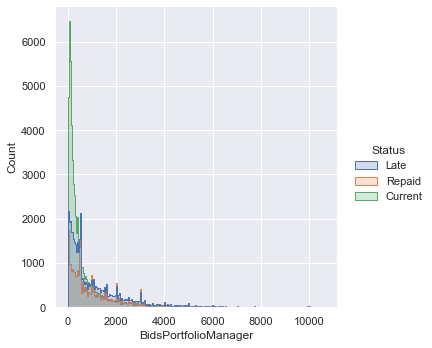

In [10]:
plt.figure(figsize=(25, 10))
sns.set_theme(style='darkgrid')
sns.displot(data, x="BidsPortfolioManager", hue="Status", element="step")
plt.show()

we can see that it is little skewed and have normal relation between target column

<Figure size 1800x720 with 0 Axes>

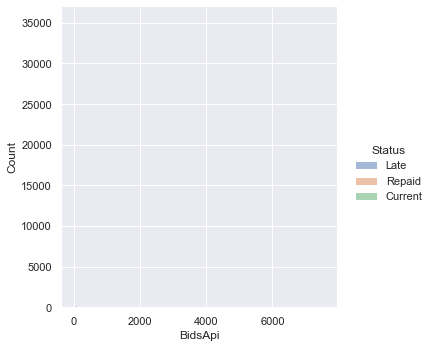

In [11]:
plt.figure(figsize=(25, 10))
#sns.set_theme(style='darkgrid')
sns.displot(data, x="BidsApi",hue='Status')
plt.show()

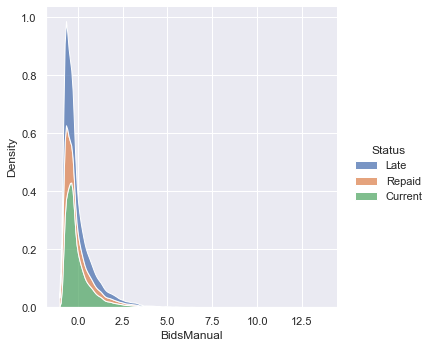

In [12]:
sns.displot(data, x="BidsManual", hue="Status", kind="kde", multiple="stack")

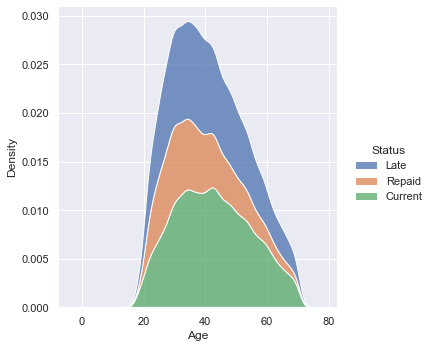

In [13]:
sns.displot(data, x="Age", hue="Status", kind="kde", multiple="stack")

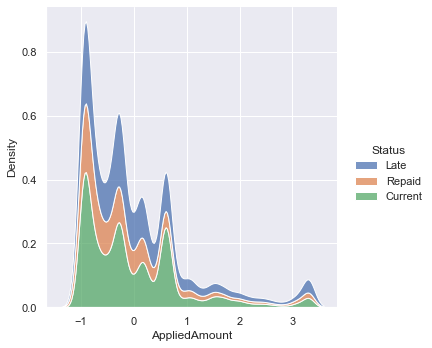

In [14]:
sns.displot(data, x="AppliedAmount", hue="Status", kind="kde", multiple="stack")

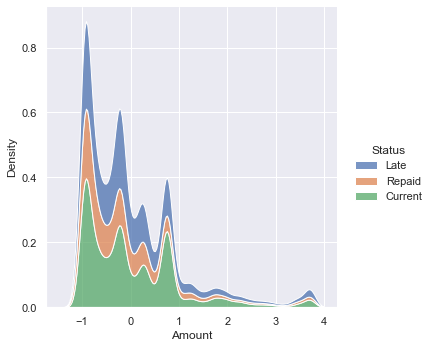

In [15]:
sns.displot(data, x="Amount", hue="Status", kind="kde", multiple="stack")
 

 'AppliedAmount',and 'Amount' are same we will delelte. it is not pure normal,a litte skewed  with different status 

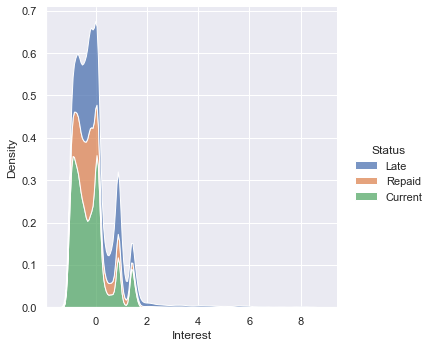

In [16]:
sns.displot(data, x="Interest", hue="Status", kind="kde", multiple="stack")

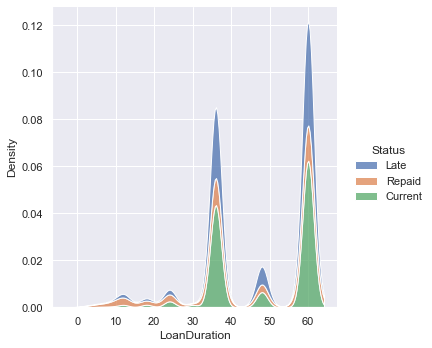

In [17]:
sns.displot(data, x="LoanDuration", hue="Status", kind="kde", multiple="stack")

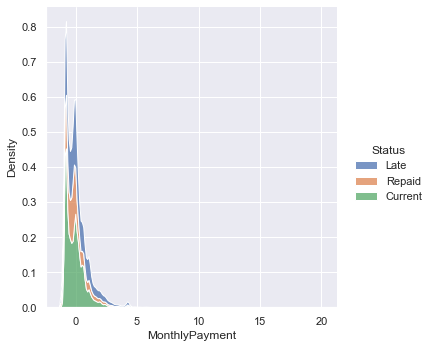

In [18]:
sns.displot(data, x="MonthlyPayment", hue="Status", kind="kde", multiple="stack")

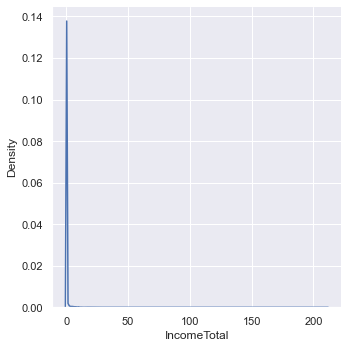

In [19]:
sns.displot(data, x="IncomeTotal", kind="kde")

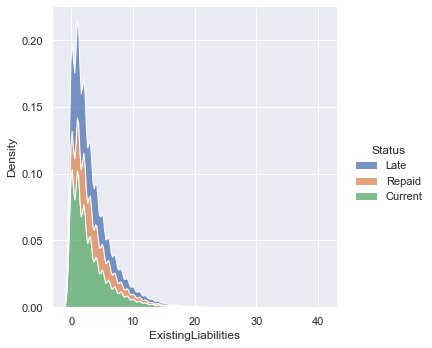

In [20]:
sns.displot(data, x="ExistingLiabilities", hue="Status", kind="kde", multiple="stack")
#     'FreeCash',
#        'MonthlyPaymentDay', 'Rating', 'CreditScoreEsMicroL',
#        'CreditScoreEeMini', 'PrincipalPaymentsMade',
#        'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
#        'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
#        'AmountOfPreviousLoansBeforeLoan',
#        'PreviousEarlyRepaymentsCountBeforeLoan

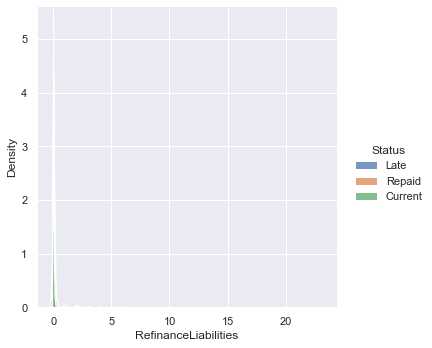

In [21]:
sns.displot(data, x="RefinanceLiabilities", hue="Status", kind="kde", multiple="stack")

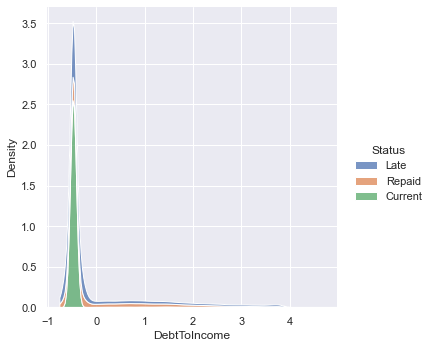

In [22]:
sns.displot(data, x="DebtToIncome", hue="Status", kind="kde", multiple="stack")

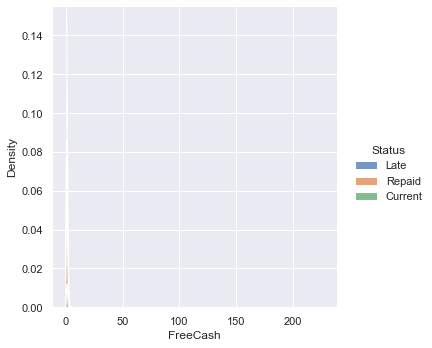

In [23]:
sns.displot(data, x="FreeCash", hue="Status", kind="kde", multiple="stack")

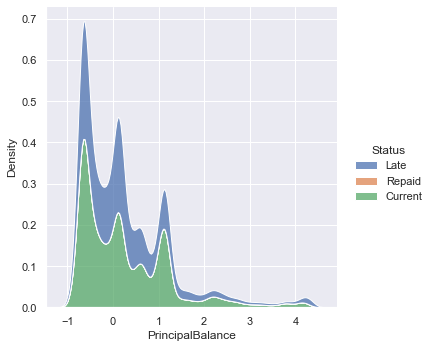

In [24]:
sns.displot(data, x="PrincipalBalance", hue="Status", kind="kde", multiple="stack")

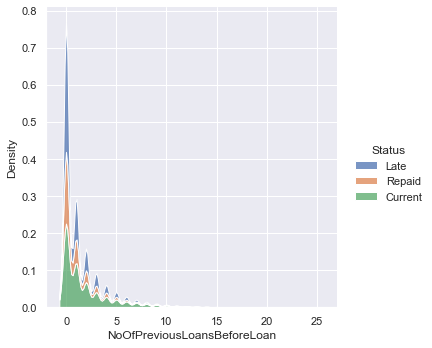

In [25]:
sns.displot(data, x="NoOfPreviousLoansBeforeLoan", hue="Status", kind="kde", multiple="stack")

## CATEGORICAL COLUMN

# BIVARIATE ANSALYSIS

<AxesSubplot:xlabel='Amount', ylabel='Gender'>

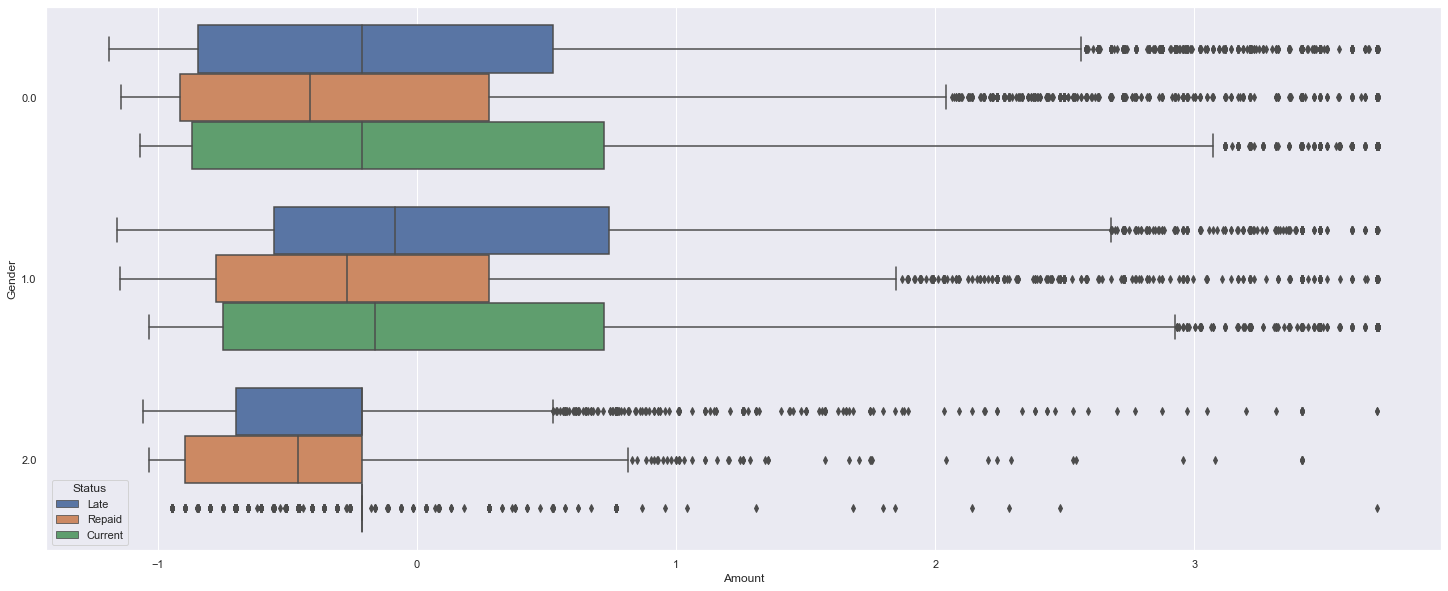

In [26]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=data, x="Amount", y="Gender", hue="Status")
# 'LanguageCode', 'County', 'UseOfLoan', 'MaritalStatus',
#        'EmploymentStatus', 'EmploymentDurationCurrentEmployer',
#        'OccupationArea', 'HomeOwnershipType', 'Status', 'Restructured

<AxesSubplot:xlabel='Age', ylabel='Gender'>

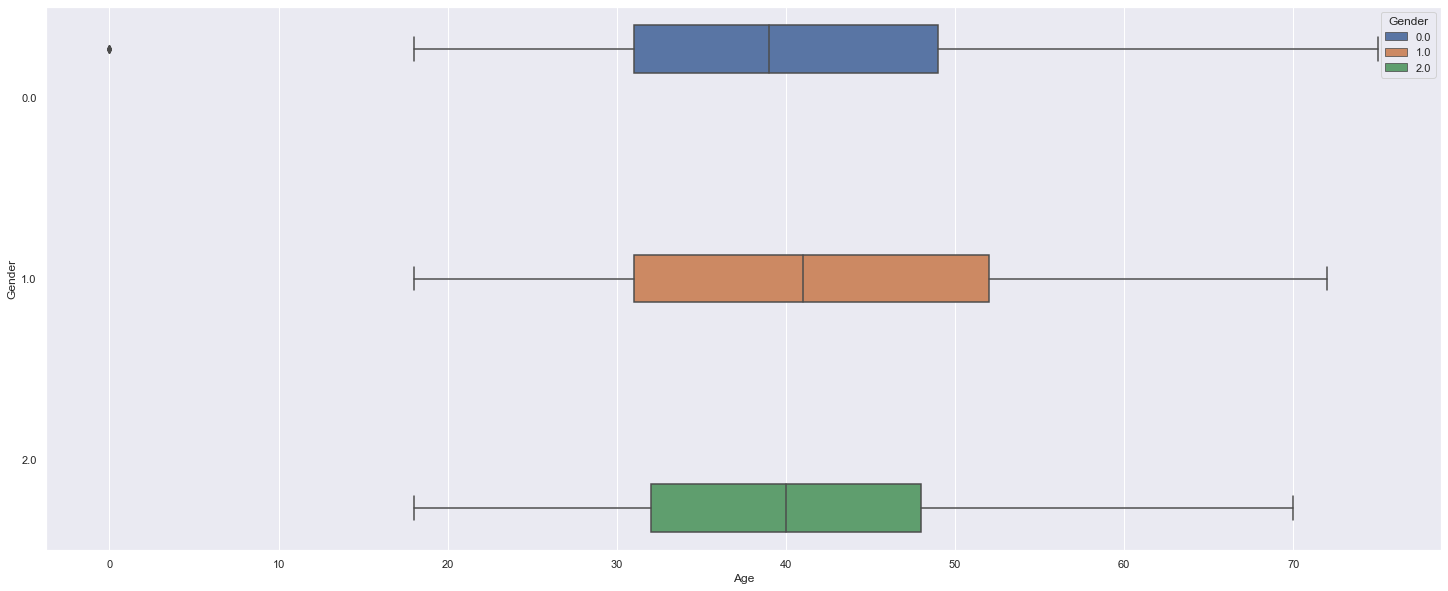

In [27]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=data, x="Age", y="Gender", hue="Gender")

<AxesSubplot:xlabel='LoanDuration', ylabel='Rating'>

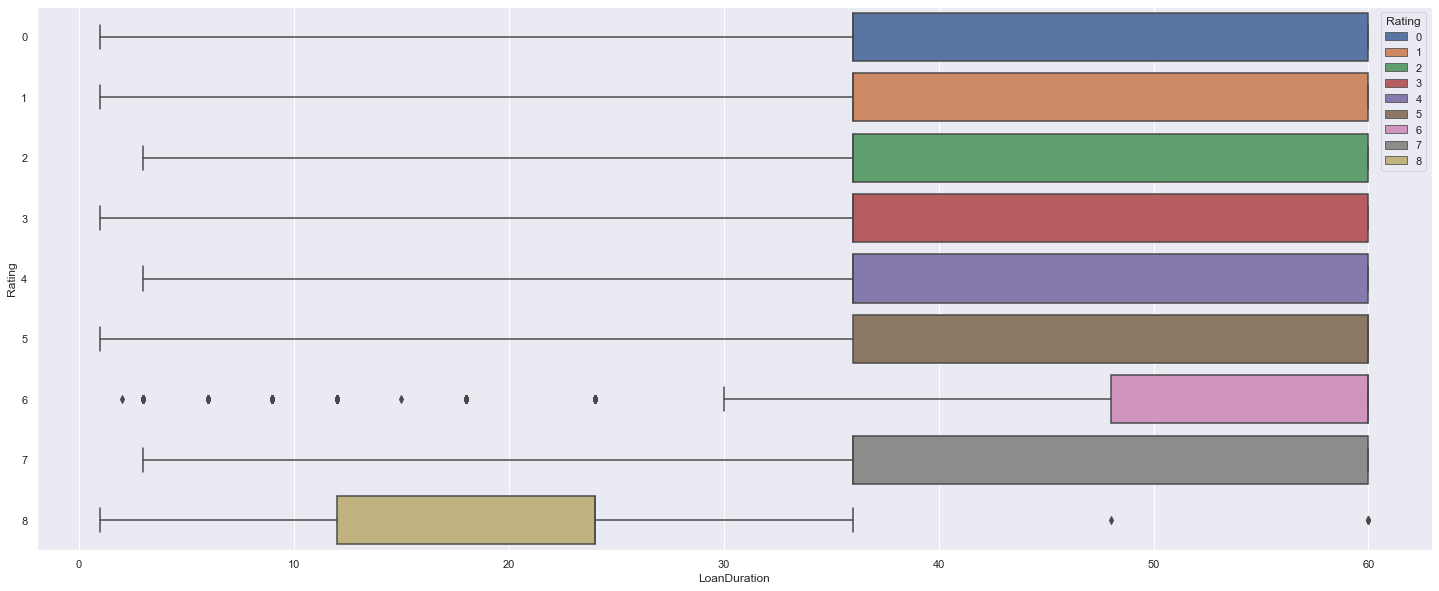

In [28]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=data, x="LoanDuration", y="Rating", hue="Rating", dodge=False)

In [31]:
# plt.figure(figsize=(25, 10))
# sns.catplot(data=data, x="PrincipalBalance", y="Status", hue="Gender", kind="swarm")

<Figure size 1800x720 with 0 Axes>

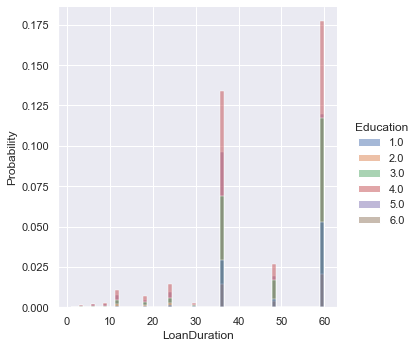

In [30]:
plt.figure(figsize=(25, 10))
sns.displot(data, x="LoanDuration", hue="Education", stat="probability")

<Figure size 1800x1800 with 0 Axes>

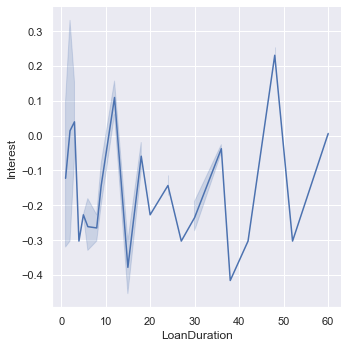

In [32]:
plt.figure(figsize=(25, 25))
sns.relplot(data=data, x="LoanDuration", y="Interest", kind="line")

<AxesSubplot:xlabel='Amount', ylabel='Interest'>

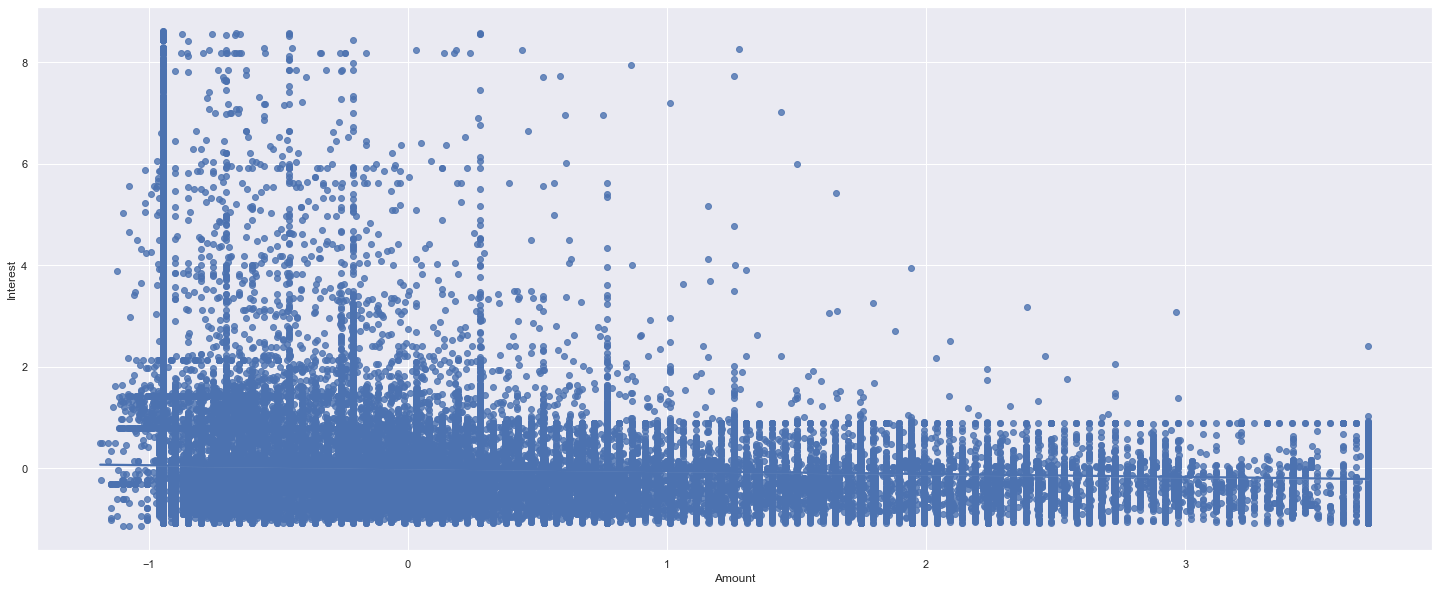

In [33]:
plt.figure(figsize=(25, 10))
sns.regplot(data['Amount'], y=data['Interest'])

TypeError: can't multiply sequence by non-int of type 'float'

<Figure size 1800x1800 with 0 Axes>

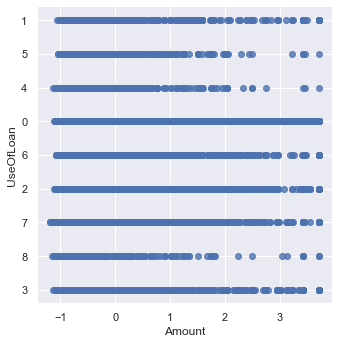

In [37]:
plt.figure(figsize=(25, 25))
data['UseOfLoan'] = data['UseOfLoan'].replace([-1,0,102,108,110,'notset'],'0')


<Figure size 1800x720 with 0 Axes>

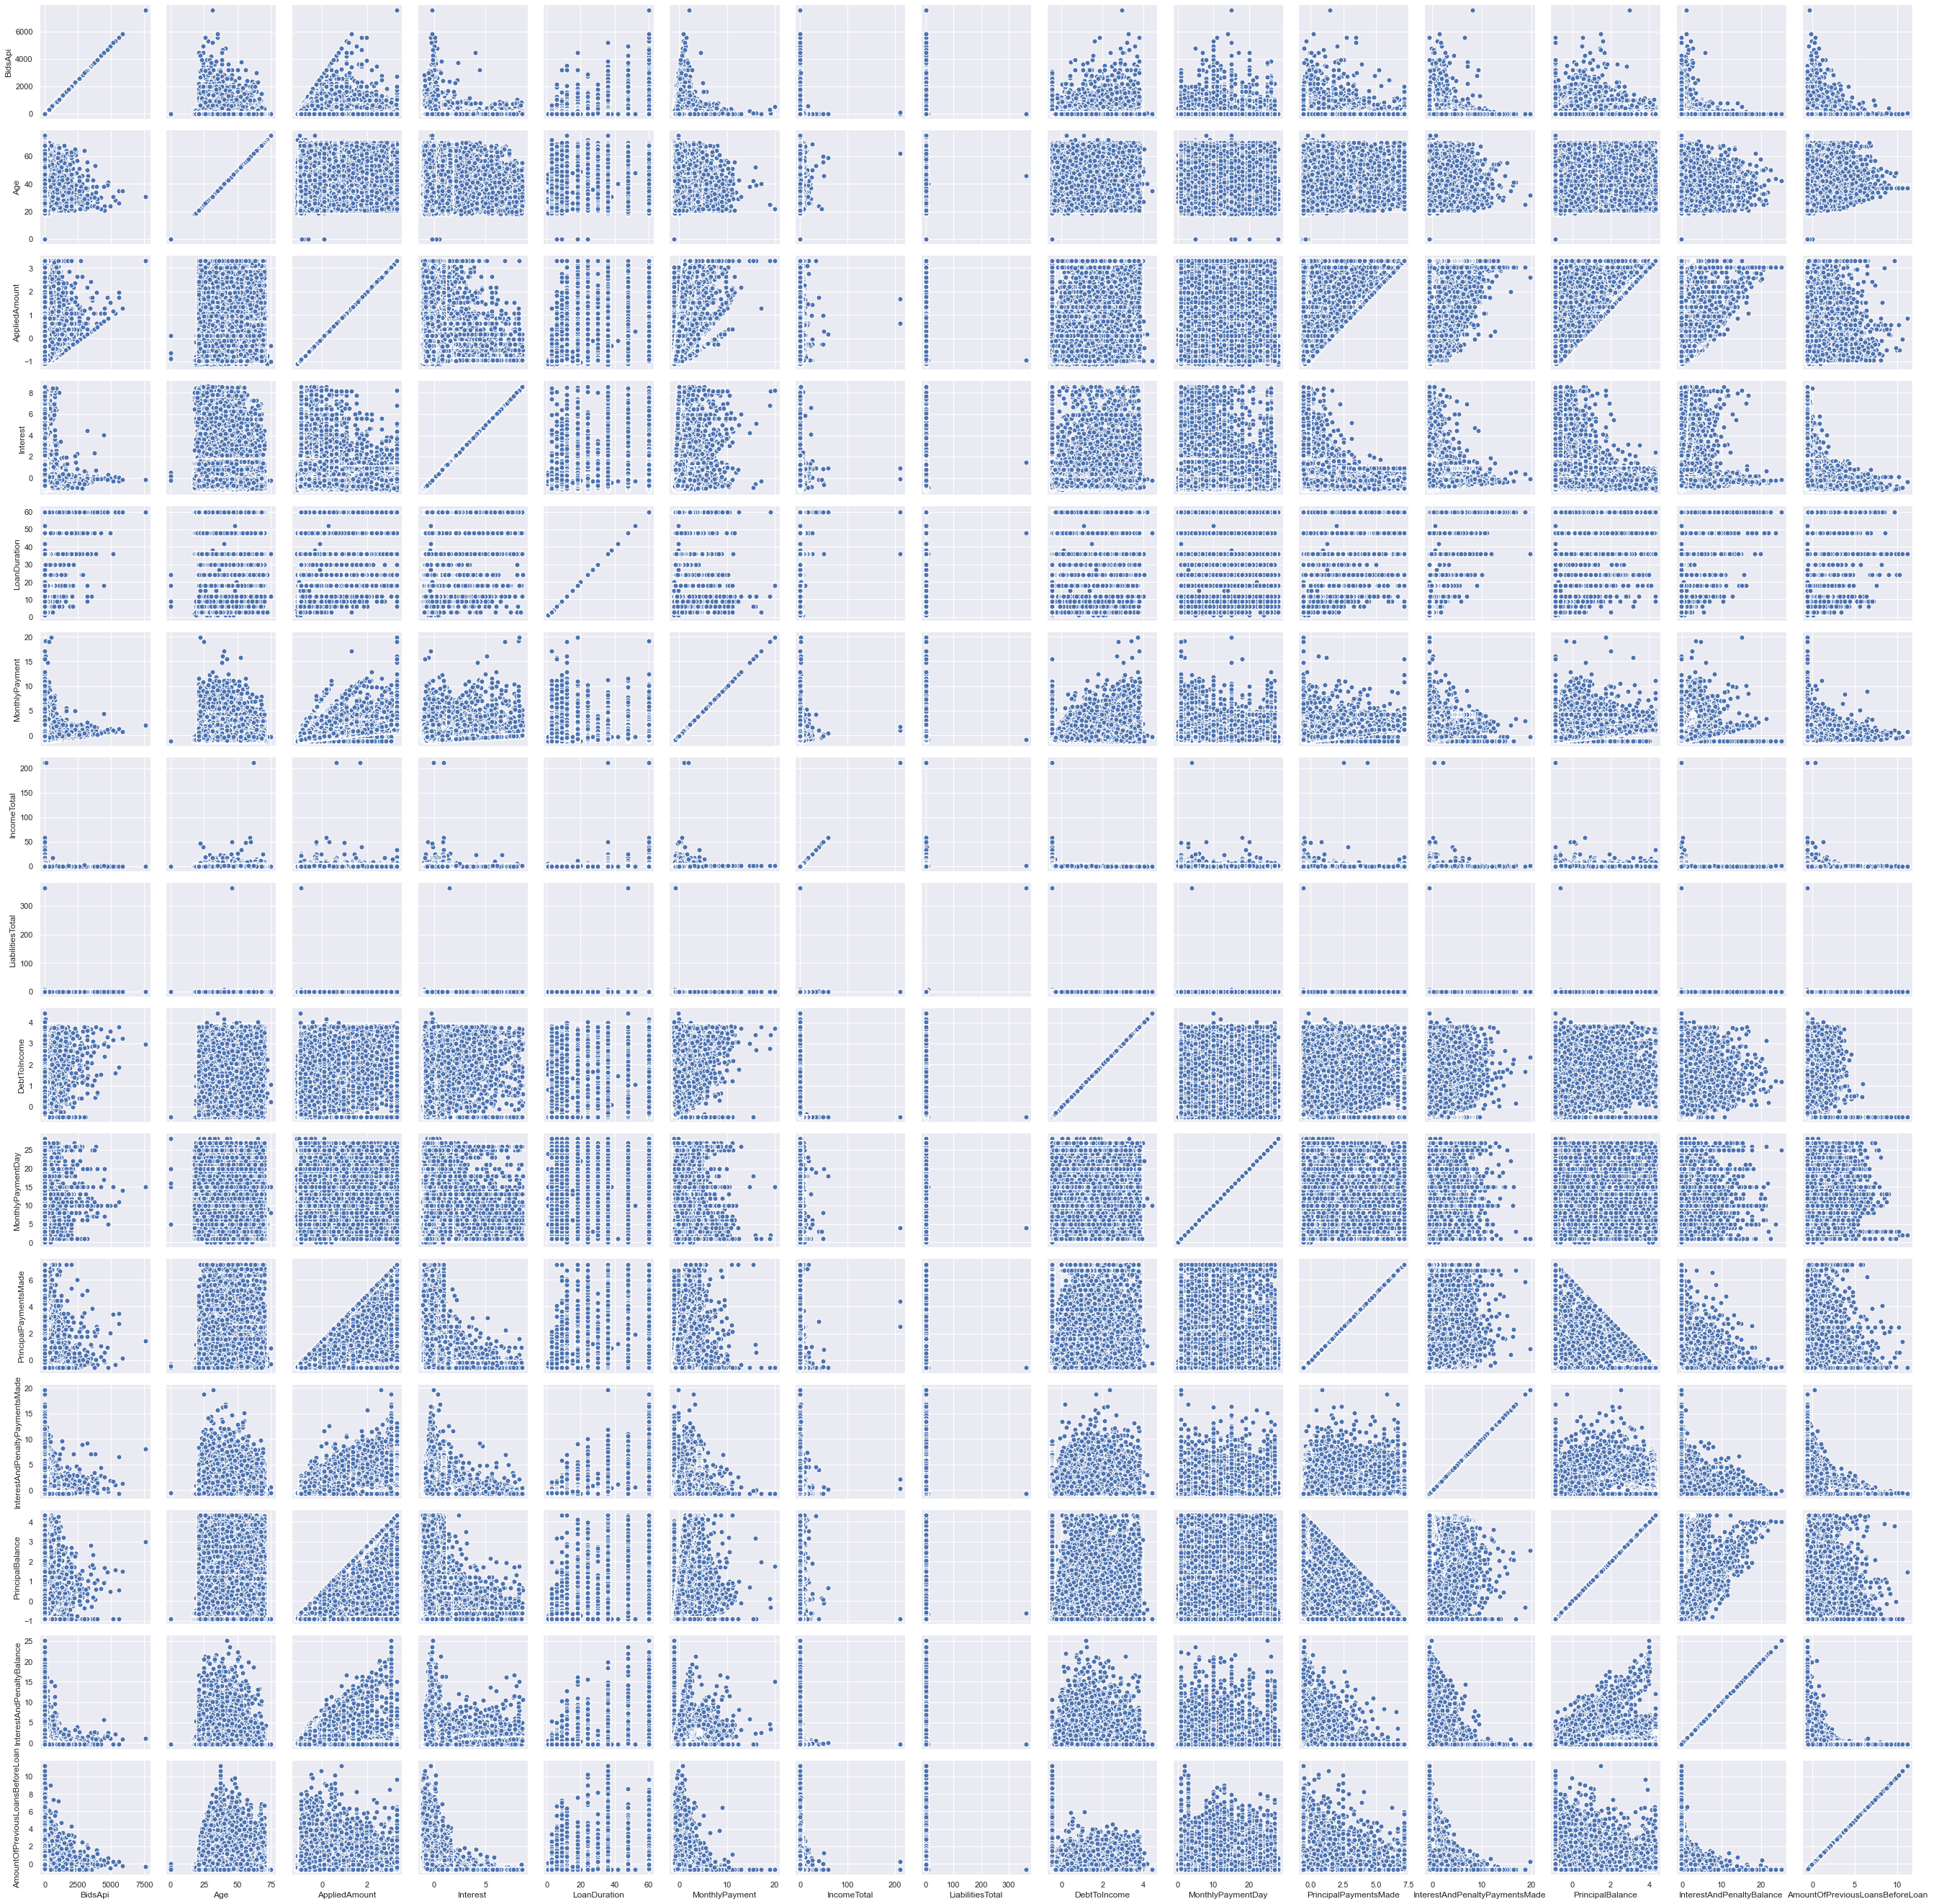

In [38]:
plt.figure(figsize=(25, 10))
g = sns.PairGrid(data[['BidsApi', 'Age', 'AppliedAmount', 'Interest', 'LoanDuration', 'MonthlyPayment', 
                       'IncomeTotal', 'LiabilitiesTotal','DebtToIncome', 'MonthlyPaymentDay', 'PrincipalPaymentsMade',
                       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance', 'InterestAndPenaltyBalance',
                       'AmountOfPreviousLoansBeforeLoan']], palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend()

<Figure size 1800x720 with 0 Axes>

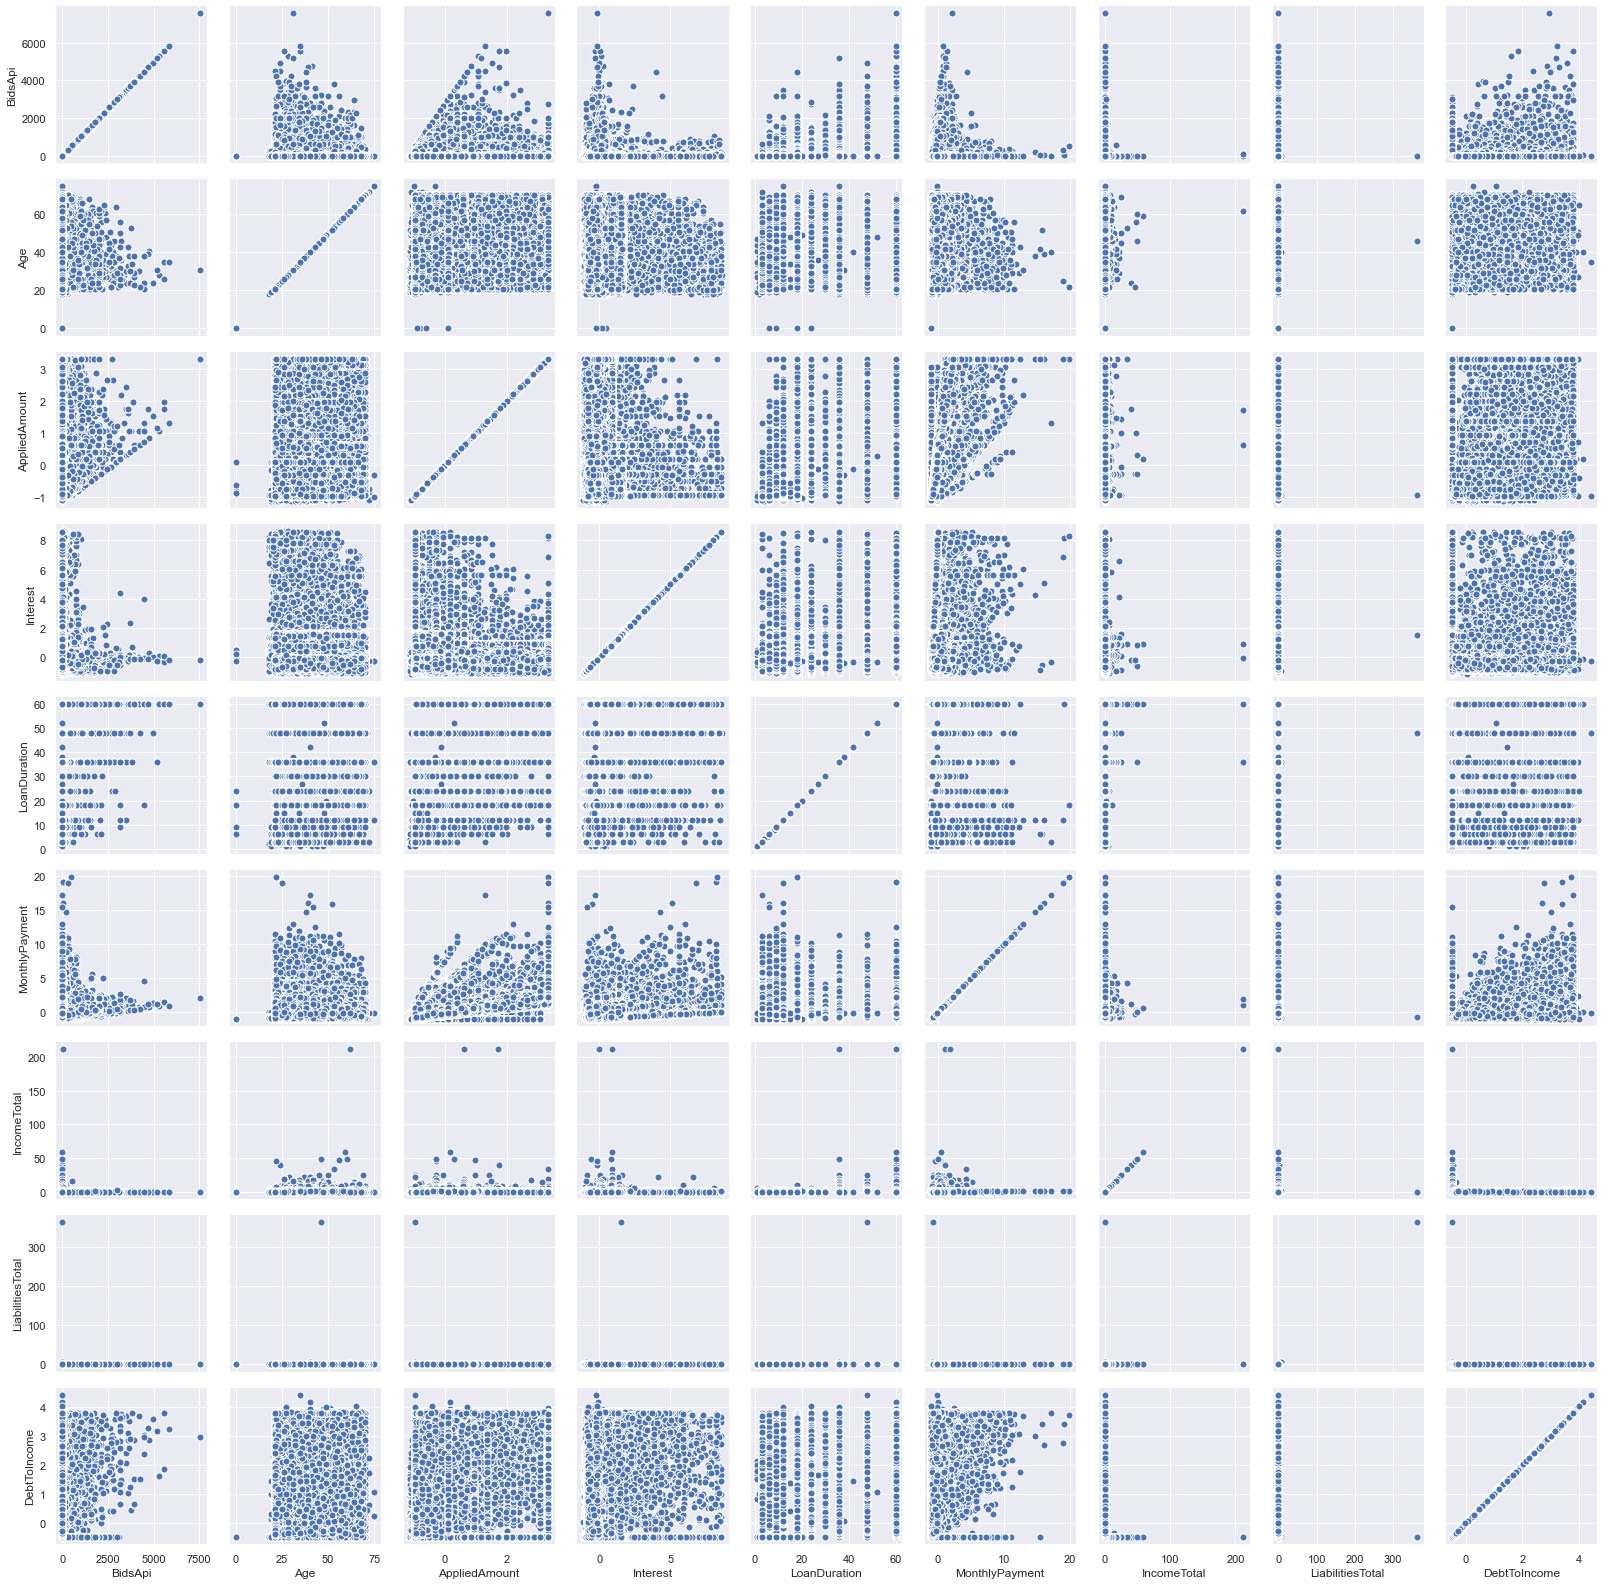

In [56]:
plt.figure(figsize=(25, 10))
g = sns.PairGrid(data[['BidsApi', 'Age', 'AppliedAmount', 'Interest', 'LoanDuration', 'MonthlyPayment','IncomeTotal','LiabilitiesTotal','DebtToIncome']], palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend()

<Figure size 1800x720 with 0 Axes>

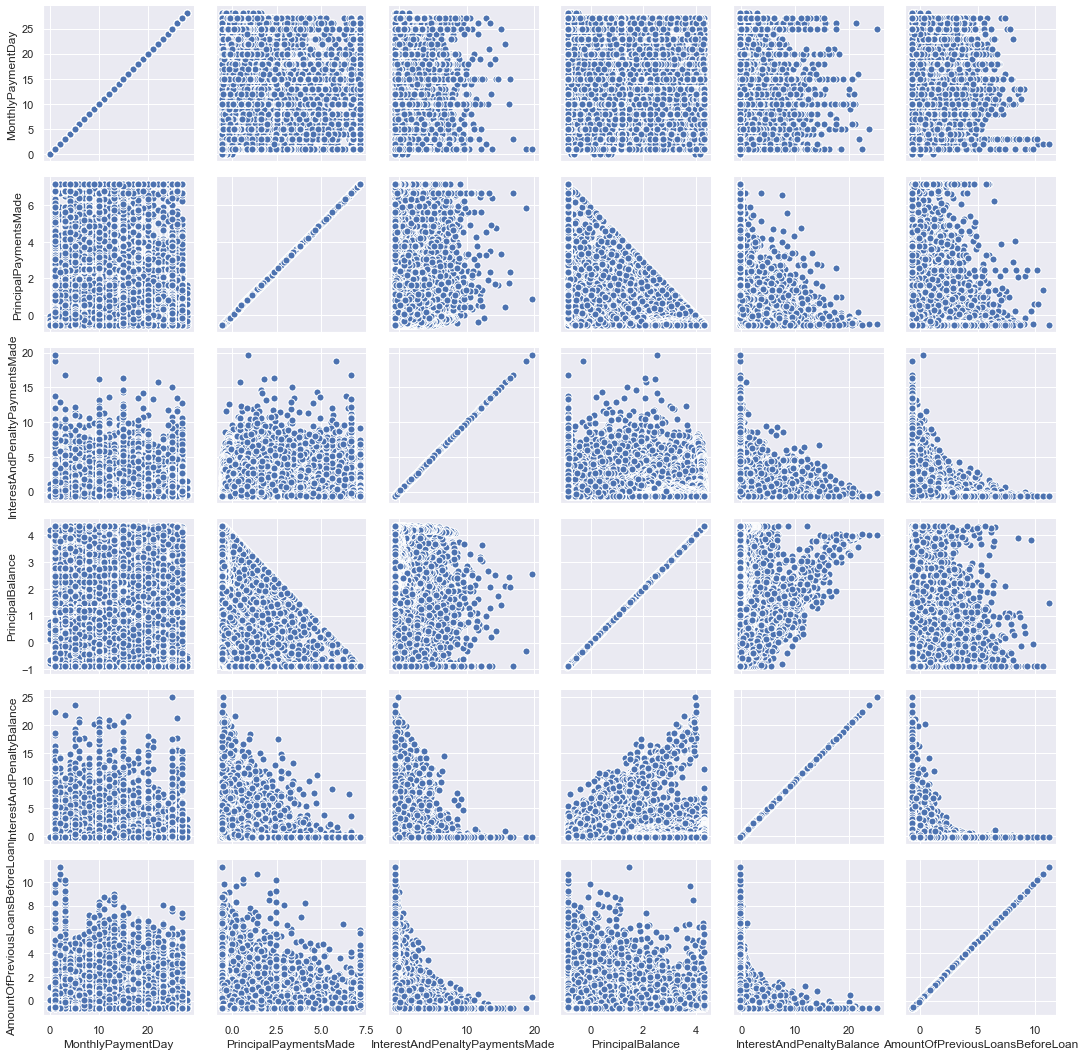

In [57]:
plt.figure(figsize=(25, 10))
g = sns.PairGrid(data[['MonthlyPaymentDay', 'PrincipalPaymentsMade','InterestAndPenaltyPaymentsMade', 'PrincipalBalance', 'InterestAndPenaltyBalance','AmountOfPreviousLoansBeforeLoan']], palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend()   

 analysis will be improve in another attempt